In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
base = automap_base()

In [6]:
# reflect an existing database into a new model
base.prepare(autoload_with=engine)

# reflect the tables
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
from sqlalchemy.sql.expression import func



In [10]:
# Find the most recent date in the data set.
for row in session.query(Measurement.date).all():
    x= (max(row))
    
# x
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [11]:
session.query(Measurement.date).filter(Measurement.date - 365).all()

[('2010-01-01',),
 ('2010-01-02',),
 ('2010-01-03',),
 ('2010-01-04',),
 ('2010-01-06',),
 ('2010-01-07',),
 ('2010-01-08',),
 ('2010-01-09',),
 ('2010-01-10',),
 ('2010-01-11',),
 ('2010-01-12',),
 ('2010-01-14',),
 ('2010-01-15',),
 ('2010-01-16',),
 ('2010-01-17',),
 ('2010-01-18',),
 ('2010-01-19',),
 ('2010-01-20',),
 ('2010-01-21',),
 ('2010-01-22',),
 ('2010-01-23',),
 ('2010-01-24',),
 ('2010-01-25',),
 ('2010-01-26',),
 ('2010-01-27',),
 ('2010-01-28',),
 ('2010-01-30',),
 ('2010-01-31',),
 ('2010-02-01',),
 ('2010-02-03',),
 ('2010-02-04',),
 ('2010-02-05',),
 ('2010-02-06',),
 ('2010-02-07',),
 ('2010-02-08',),
 ('2010-02-09',),
 ('2010-02-11',),
 ('2010-02-12',),
 ('2010-02-13',),
 ('2010-02-14',),
 ('2010-02-15',),
 ('2010-02-16',),
 ('2010-02-17',),
 ('2010-02-19',),
 ('2010-02-20',),
 ('2010-02-21',),
 ('2010-02-22',),
 ('2010-02-23',),
 ('2010-02-24',),
 ('2010-02-25',),
 ('2010-02-26',),
 ('2010-02-28',),
 ('2010-03-01',),
 ('2010-03-02',),
 ('2010-03-03',),
 ('2010-03

In [12]:
import datetime as dt

<AxesSubplot:xlabel='Date', ylabel='Inches'>

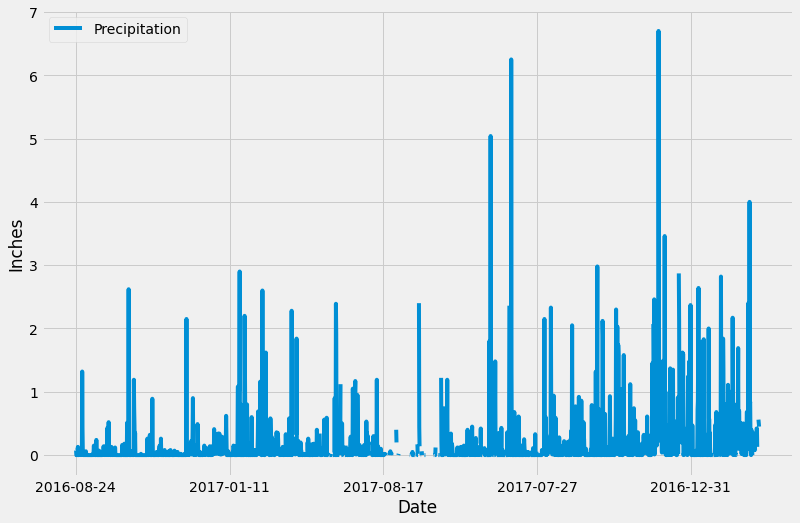

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date = dt.datetime.strptime(x,'%Y-%m-%d')
one_year = date - dt.timedelta(days= 365)


# Perform a query to retrieve the data and precipitation scores
new_session = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > one_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(new_session)
df.columns = ['Date', 'Precipitation']
df= df.set_index('Date')
df.reset_index(drop = True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(12,8), ylabel = 'Inches')





# Exploratory Station Analysis

In [201]:
# Design a query to calculate the total number stations in the dataset
total_sation= session.query(Measurement.station).group_by(Measurement.station).count()
total_sation

9

In [238]:
one_year

datetime.datetime(2016, 8, 23, 0, 0)

In [267]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
total_sation_temp = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
# List the stations and the counts in descending order.





[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [290]:

# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(Measurement.tobs)).first()
print(f'Min temp {min_temp}')
max_temp = session.query(func.max(Measurement.tobs)).first()
print(f'Max temp {max_temp}')
avg_temp = session.query(func.avg(Measurement.tobs)).first()
print(f'Avg temp {avg_temp}')
# # List the stations and the counts in descending order.


Min temp (53.0,)
Max temp (87.0,)
Avg temp (73.09795396419437,)


In [308]:
# Using the most active station id
x = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date >= one_year).filter(Measurement.station == 'USC00519281').all()
x = pd.DataFrame(x, columns=['Station', 'Temprature'])
x




,Station,Temprature
0,USC00519281,77.0
1,USC00519281,80.0
2,USC00519281,80.0
3,USC00519281,75.0
4,USC00519281,73.0
...,...,...
346,USC00519281,77.0
347,USC00519281,77.0
348,USC00519281,76.0
349,USC00519281,76.0


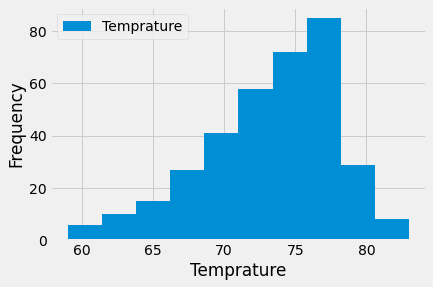

In [310]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
x.plot(kind = 'hist')
plt.xlabel('Temprature')
plt.show()

# Close session

In [ ]:
# Close Session
session.close()